In [192]:
import pandas

#load the dataset
dataset = pandas.read_csv("../mediaeval-2015-trainingset.txt", sep='\t')

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 7 columns):
tweetId       14277 non-null int64
tweetText     14277 non-null object
userId        14277 non-null int64
imageId(s)    14277 non-null object
username      14277 non-null object
timestamp     14277 non-null object
label         14277 non-null object
dtypes: int64(2), object(5)
memory usage: 780.9+ KB


In [56]:
dataset.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake


In [193]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer as twd

list_of_stopwords = stopwords.words('english') + stopwords.words('french') + stopwords.words('spanish') + stopwords.words('portuguese') + stopwords.words('arabic') + stopwords.words('russian') + stopwords.words('swedish') + stopwords.words('dutch') + stopwords.words('indonesian')

#remove stopwords
def remove_stopwords(tweet):
    new_text = ""
    for word in tweet.split():
        if word not in list_of_stopwords:
            new_text += word + " "
    #words = [w for w in tweet if w not in list_of_stopwords]
    return new_text


#change labels 
dataset['label_code'] = dataset['label']
dic = {'real': 0, 'fake': 1, 'humor': 1}
dataset = dataset.replace({"label_code": dic})

#change content 
dataset['changed_tweets'] = dataset['tweetText']


dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('[“”"]@\w+:[\w\W]*[“”"]', '')        #remove quoted retweets
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('(RT|Rt):?\s?\W?(@?\w+:?).*', '')     #remove retweets  
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('MT\s?:?\s?[“”"]?@\w+:.*', '')     #remove retweets  
dataset['changed_tweets'] = dataset['changed_tweets'].str.lower() 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('@\w+:.*', '')     #remove retweets  

dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('(via)?\s?(@\w+:?)', '')             #remove mentions
#dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\s?MT\s', '')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('(https?://\s?t.co/\w+)|(http:\s\W+t.co\W+\w+)', '')      #remove http links

dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('&gt;|&lt;', '')  
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\\\\n', ' ')                       #remove special characters 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\b[o0]_[o0]\b', '')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\b:[o0]\b', '')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\b:p\b', '')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('h/t', '')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('_|#', '')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\/', ' ')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('n\.y\.c?|n\.j\.', '')



dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\sbtw', ' by the way')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\s1st', ' first')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\s2nd', ' second')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('&amp;', 'and')  
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('(^|\b)yea\b', ' yes ')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\su\s', ' you ') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\sr\s', ' are ') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\sur\s', ' your ')  
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('hurricanesandy', 'hurricane sandy') 


#removing corrupted rows
indexnames1 = dataset[dataset['changed_tweets'].str.contains(pat = "\+0000")].index
dataset.drop(indexnames1, inplace=True)  

dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('[^\w\s]', ' ')                   #remove special characters 


#remove digits

dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('(^|\s)\d[^\s\d]*', '')  
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('(^|\s)\d\d[^\s\d]*', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('(^|\s)\d\d\d[^\s\d]*', '')  

dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('bcuz', 'because')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('(^|\s)ny\s', ' new york ') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('newyork', 'new york') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('(^|\s)nyc\s', ' new york city ') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('(^|\s)nj\s', ' new jersey ') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\sasi\s', ' así ')  
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\svs\s', ' versus ')  
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('(^|\s)im\s', ' i am ')  
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\sthru\s', ' i am ') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\sn\s', ' and ') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\sgoin\s', ' going ') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('unknownsoldier', 'unknown soldier')




#removing unnecessary words
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('π', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('ΰέ', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\s?whoa+h?', '')  
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('lmf?ao+', '')  
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\sbro\s', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\sdis\s', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\soh\s', '')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\s?(ha)+\s|\s?(waha)+\s', '')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('omf?g+', '')  
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\sà\s', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\ssh\s', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('regram', '')
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('instamood', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('yikes', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('wow', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('smh', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('(^|\s)rt\s', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('lo+l', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('(o+h+)+', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('wtf|\s?v[ií]a\s', '')
#dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\brt\b', '')  
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\s?yo\s', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\sabt\s', '') 
dataset['changed_tweets'] = dataset['changed_tweets'].str.replace('\sβ\s', '') 


dataset['changed_tweets'] = dataset['changed_tweets'].apply(lambda x : remove_stopwords(x))         #remove stopwords

#drop fields where tweet is empty
indexnames2 = dataset[dataset.changed_tweets == ''].index
indexnames3 = dataset[dataset.changed_tweets == ' '].index
dataset.drop(indexnames2, inplace=True)
dataset.drop(indexnames3, inplace=True)
#dataset['tweetText'] = dataset['tweetText'].apply(lambda x : word_tokenize(x))            #tokenize words in tweets

        
#remove empty lists left after removing stopwords
#indexnames4 = dataset[dataset['tweetText'].apply(lambda x : x == [])].index
#dataset.drop(indexnames4, inplace=True)

#detokenize words to drop duplicates again
#dataset['tweetText'] = dataset['tweetText'].apply(lambda x : "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in x]).strip()) 

#remove duplicates
dataset.drop_duplicates(subset = 'changed_tweets', keep = 'first', inplace = True)
   

dataset = dataset.reset_index(drop=True)




In [195]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9707 entries, 0 to 9706
Data columns (total 9 columns):
tweetId           9707 non-null int64
tweetText         9707 non-null object
userId            9707 non-null int64
imageId(s)        9707 non-null object
username          9707 non-null object
timestamp         9707 non-null object
label             9707 non-null object
label_code        9707 non-null int64
changed_tweets    9707 non-null object
dtypes: int64(3), object(6)
memory usage: 682.6+ KB


In [174]:
#check for empty strings
tw = dataset['changed_tweets']
count = 0
for i in range(len(tw)):
    if tw[i]==' ':
        count +=1
print(count)
        

0


In [194]:
original = dataset['tweetText']
changed = dataset['changed_tweets']

for j in range(len(original)):
    print("\n")
    print(original[j])
    print("\n--------------------------------------------------------")
    print(changed[j])
  
    
        
     
    
                   





¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. http://t.co/JQQeRPwN

--------------------------------------------------------
acuerdan película día después mañana recuerda pasando huracán sandy 


Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy  http://t.co/PTdAXABZ

--------------------------------------------------------
buena foto huracán sandy recuerda película día independencia id4 sandy 


Scary shit #hurricane #NY http://t.co/e4JLBUfH

--------------------------------------------------------
scary shit hurricane new york 


My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽 http://t.co/Ex61doZk

--------------------------------------------------------
fave place world new york city hurricane sandy statueofliberty 


42nd #time #square #NYC #subway #hurricane http://t.co/daX5YY7X

--------------------------------------------------------
2nd time sq



Guarding Tomb of the Unknown Soldier come hell or Hurricane Sandy http://t.co/LZ1j6xGI

--------------------------------------------------------
guarding tomb unknown soldier come hell hurricane sandy 


Heroes RT @OMGFacts: Amazing soldiers standing at the Tomb of the Unknown Soldier during hurricane Sandy. http://t.co/W2autqje

--------------------------------------------------------
heroes 


Tomb of the Unknown Solider during Hurricane Sandy. #America http://t.co/q2NMO2ko

--------------------------------------------------------
tomb unknown solider hurricane sandy america 


Meanwhile at the Tomb of the unknown Soldier business as usual #Sandy http://t.co/SsOHdtie

--------------------------------------------------------
meanwhile tomb unknown soldier business usual sandy 


thats insane bro!!! RT @Godiva_Dark_89: Crazy Shot of NYC w/ Hurricane Sandy on the Move http://t.co/ebN5dBLv

--------------------------------------------------------
thats insane 


Tomb of the unknwn sold

fuerza new york city sandy muchas bendiciones gente manhattan 


amazing photo #sandy http://t.co/TMwF8vuv

--------------------------------------------------------
amazing photo sandy 


Foto di illypocket #sandy http://t.co/gTH6iamS

--------------------------------------------------------
foto illypocket sandy 


Omg..😳 #nofilter #sandy http://t.co/hBeCuTXa

--------------------------------------------------------
nofilter sandy 


Flooding in NJ bringin sharks to the yard?!? WTF! Be safe! #Sandy http://t.co/ErmGfoXY

--------------------------------------------------------
flooding new jersey bringin sharks yard safe sandy 


Movimiento de Sandy http://t.co/wSdeuoLG  Impresionante la foto de #Sandy http://t.co/74chIbLn via @elcuara #Panama

--------------------------------------------------------
movimiento sandy impresionante foto sandy panama 


Shark alert in New Jersey suburb hit by flooding !! #sandy   http://t.co/j7cYVGrA

-----------------------------------------------------

--------------------------------------------------------
shit orkaan sandy zemmen gewoon haaien stad 


Sick pic of Sandy over the Big Apple... http://t.co/ly8tn8ME

--------------------------------------------------------
sick pic sandy big apple 


'Good 'ol Sandy' Hang tight and stay dry my New York friends! "The sun will come out tomorrow!" #prayers http://t.co/A8i0Kycz

--------------------------------------------------------
good ol sandy hang tight stay dry new york friends sun come tomorrow prayers 


since we all talking bout her...why not post of pic of how sandy looking in NY today 😨 http://t.co/XCoYtLbn

--------------------------------------------------------
since talking bout post pic sandy looking new york today 


“@ARSONALDAREBEL: So DIS WAT SANDY GOT DA SKY IN NYC LOOKIN LIKE. http://t.co/f94A5RN7” Looks EXACTLY like the scene in 2012

--------------------------------------------------------
looks exactly like scene in012 


Today in DC, Sandy brings rain, but it com

Así esta el Huracán Sandy en Nueva York... QUE DIOS JEHOVA LOS PROTEJA. http://t.co/r0khbvvz

--------------------------------------------------------
así huracán sandy nueva york dios jehova proteja 


Lo que realmente sucedio en NY con el huracan Sandy jajajaja http://t.co/Sp1caUUD

--------------------------------------------------------
realmente sucedio new york huracan sandy jajajaja 


Lo que dejo el huracan sandy en las calles de nueva york http://t.co/M7N67GHw

--------------------------------------------------------
dejo huracan sandy calles nueva york 


Así está New York con el huracán sandy. ¡Parece de película! Ö_______Ö http://t.co/vsarWIpy

--------------------------------------------------------
así new york huracán sandy parece película öö 


JAJAJAJAJA LO QUE HIZO EL HURACÁN SANDY EN NUEVA YORK http://t.co/5aAW8RAd

--------------------------------------------------------
jajajajaja hizo huracán sandy nueva york 


Fotografías falsas de Sandy en Nueva York (y 2). Cui

today flow sandy 


#hurracaine #sandy  \nAre you for real. O.0 http://t.co/jC4Tx6XT

--------------------------------------------------------
hurracaine sandy real 


Damn was it that serious 😨 #Sandy #SadDay @_ShmokeAStorm http://t.co/9CctUfHU

--------------------------------------------------------
damn serious sandy sadday 


That's so scare #sandy http://t.co/uyoEUVP2

--------------------------------------------------------
scare sandy 


When Mans Best Friend Needs a Lift. Photo from #Sandy 's Wake http://t.co/YaKfOMQH

--------------------------------------------------------
mans best friend needs lift photo sandy wake 


Las imagenes pasadas eran falsas. Esta es la buena! #Sandy #NY http://t.co/YRUMMn0z

--------------------------------------------------------
imagenes pasadas falsas buena sandy new york 


LOL #HurricaneSandy #Sandy #NYC #photooftheday http://t.co/MmeArW6w

--------------------------------------------------------
hurricane sandy sandy new york city photoofth

got foto sandy damage hometown 


“@TweetThvtUp_ “@LesBiREAL_JENx3 Lmaooo sandy that serious 😂😂😂😂 http://t.co/bH3GxwvQ””

--------------------------------------------------------
sandy serious 


Finally a photo of Sandy that's NOT faked.  http://t.co/E4l2pQNY

--------------------------------------------------------
finally photo sandy faked 


@Toure Wow yeah here's another 'incredible Sandy pic', you gullible halfwit: http://t.co/xjFJO4Hi

--------------------------------------------------------
yeah another incredible sandy pic gullible halfwit 


Just got the word from 1 of my moms colleagues on how bad hurricane sandy really is right now #not http://t.co/wkWbqoxL

--------------------------------------------------------
got word moms colleagues bad hurricane sandy really right 


“@Kilpatrick24: Awesome picture. Tomb of the unknown soldier still being guarded during Hurricane Sandy http://t.co/RnvtXHC3”\n#FakeSandy

--------------------------------------------------------
fakesan

passes 


😳 HOLY SHIT SANDY IS GETTING SERIOUS! 😭 #Yomama http://t.co/bJDVhTcr

--------------------------------------------------------
holy shit sandy getting serious yomama 


Alright hurricane sandy is just getting out of hand #hurricanesandy #nosnow #justrain http://t.co/hsi6WLLg

--------------------------------------------------------
alright hurricane sandy getting hand hurricane sandy nosnow justrain 


Ohh nahhh lol @FUNNYPICS: Hurricane Sandy is getting real   http://t.co/B3natlsh

--------------------------------------------------------
nahhh 


This is a picture I took of hurricane sandy. It surely is getting crazy. http://t.co/EGDimae3

--------------------------------------------------------
picture took hurricane sandy surely getting crazy 


This old ass pic lol RT @_LiteSKViixen: 👀👀never lol RT @FUNNYPICS: Hurricane Sandy is getting real   http://t.co/vii64ycO

--------------------------------------------------------
old ass pic 


“@skorty_spice: REAL HURRICANE SANDY


#repost definitely looks like a scene from The Day After Tomorrow #hurricanesandy #newyork http://t.co/TIeiqO2W

--------------------------------------------------------
repost definitely looks like scene day tomorrow hurricane sandy new york 


Great to see Lady Liberty also taking the right safety precautions, bless. #Sandy #HurricaneSandy http://t.co/TGc9KOuK

--------------------------------------------------------
great see lady liberty also taking right safety precautions bless sandy hurricane sandy 


Rolling right now. #hurricanesandy #hilarious #sorrynotsorry #thisshouldntbefunny http://t.co/FWTWo2lN

--------------------------------------------------------
rolling right hurricane sandy hilarious sorrynotsorry thisshouldntbefunny 


Creased! #hurricanesandy #hideandseek http://t.co/xXFMMGTQ

--------------------------------------------------------
creased hurricane sandy hideandseek 


RT  too funny “@AishaTheModel: Shit just got real in NYC! #HurricaneSandy LMAOOOO 😂😂😂😂😂😂

gente, que foto perfeita/assustadora do furacão Sandy http://t.co/y0F8fKIN :O

--------------------------------------------------------
gente foto perfeita assustadora furacão sandy 


Sandy has let her pet sharks loose... Could she more of a bitch?! http://t.co/5KGWxJHh

--------------------------------------------------------
sandy let pet sharks loose could bitch 


#RemontageDeCouetteSurLaTete RT @thinkprogress: Sandy approaches NYC  http://t.co/BNDnJhmn

--------------------------------------------------------
remontagedecouettesurlatete 


Damn sandy fuxkin shit up http://t.co/Ijp5CUiO

--------------------------------------------------------
damn sandy fuxkin shit 


Hurracan sandy NY 2012 http://t.co/jzYNUYY6

--------------------------------------------------------
hurracan sandy ny012 


NYC meet Sandy... Sandy do work #welcometothejungle http://t.co/ncUzbIVp

--------------------------------------------------------
new york city meet sandy sandy work welcometothejungle 


Sa

--------------------------------------------------------
insane picture hurricane sandy approaching new york 


Craaaazy!! 😱 #HurricaneSandy http://t.co/3shNQNv9

--------------------------------------------------------
craaaazy hurricane sandy 


Praying for everyone on the east cost. #hurricanesandy #pray #love http://t.co/PQVml5AA

--------------------------------------------------------
praying everyone east cost hurricane sandy pray love 


#HurricaneSandy #TheWorldIsEnding http://t.co/Kl8qKLTR

--------------------------------------------------------
hurricane sandy theworldisending 


#hurricanesandy #NYC #2012 #pray #mothernature http://t.co/61xmLz9i

--------------------------------------------------------
hurricane sandy nyc012 pray mothernature 


That is just crazy scary.. #Hurricane #HurricaneSandy #Frankenstorm #Swag #Scary #creepy #omg http://t.co/iy8oJqVR

--------------------------------------------------------
crazy scary hurricane hurricane sandy frankenstorm swag sc


NYC getting pounded by #sandy Rt "@ethanklapper: Ground Zero = Flooded (AP Photo/John Minchillo) http://t.co/xkABQWhJ"

--------------------------------------------------------
new york city getting pounded sandy 


#sandy at the #wtc ground zero construction site. Still unsure exactly where this is. http://t.co/aKncC1qn

--------------------------------------------------------
sandy wtc ground zero construction site still unsure exactly 


Flooding at ground zero. #sandy http://t.co/SKzOB1h4

--------------------------------------------------------
flooding ground zero sandy 


This picture is unreal, flood waters at Ground Zero construction site #sandy http://t.co/vp7cPrNS

--------------------------------------------------------
picture unreal flood waters ground zero construction site sandy 


INSANE pics: 1)Ground Zero inundated: http://t.co/KJykc8x8  2)#Sandy busting thru Hoboken PATH station: http://t.co/bAp02AJX

--------------------------------------------------------
insane 

A pic of manhattan, sandy is no joke hope everyone is safe http://t.co/gowL8YBA

--------------------------------------------------------
pic manhattan sandy joke hope everyone safe 


Sandy you crazy ho http://t.co/JzLakDVE

--------------------------------------------------------
sandy crazy ho 


Hurricane Sandy flooded Manhattan NY. Many in NY and NJ have lost power. #prayersplease http://t.co/2GUyQzTU

--------------------------------------------------------
hurricane sandy flooded manhattan new york many new york new jersey lost power prayersplease 


#AstroPicture Badai Sandy difoto dari luar angkasa: http://t.co/5rSgjRof

--------------------------------------------------------
astropicture badai sandy difoto angkasa 


Sandy already fucking up 9 year olds days. This is in Milford #suckstosuck http://t.co/RpMqbost

--------------------------------------------------------
sandy already fucking year olds days milford suckstosuck 


The Atlantic City boardwalk is a different kind 

#hurricanesandy #sandy #perfectstorm #superstorm #cnn #nyc #ny #اعصار_ساندي #usa #unitedstate #new @ My Home http://t.co/s97EchLH

--------------------------------------------------------
hurricane sandy sandy perfectstorm superstorm cnn new york city new york اعصارساندي usa unitedstate new home 


This is crazy ... #Seaside #NewJersey #HurricaneSandy http://t.co/28PjU208

--------------------------------------------------------
crazy seaside newjersey hurricane sandy 


Shit just got real with this "super storm" #repost #HurricaneSandy http://t.co/GGONIwwK

--------------------------------------------------------
shit got real super storm repost hurricane sandy 


#FDR #Eastside #NYC #hurricanesandy #Sandy http://t.co/fTRnPP7k

--------------------------------------------------------
fdr eastside new york city hurricane sandy sandy 


stay safe east coast friends. #hurricanesandy http://t.co/NQbPkteu

--------------------------------------------------------
stay safe east coast friend

Wow terrible...Seaside #Sandy http://t.co/zhgVT0ro

--------------------------------------------------------
terrible seaside sandy 


rivetingradiance's photo http://t.co/E561YIUs this is crazy what #sandy did

--------------------------------------------------------
rivetingradiance photo crazy sandy 


Dwyer is a Mess. #Sandy http://t.co/3BtIp1iH

--------------------------------------------------------
dwyer mess sandy 


#manhattan #newyorkcity #sandy http://t.co/lfFh4nvy” ODDIO GUARDATE COME SI STA RIDICENDO NEW YORK! AMERICA SIAMO CON VOI CE LA FARETE!!

--------------------------------------------------------
manhattan new yorkcity sandy oddio guardate come si sta ridicendo new york america siamo voi farete 


#Sandy overwhelmed the new #WTC site. http://t.co/8cIKbJzA

--------------------------------------------------------
sandy overwhelmed new wtc site 


#Sandy #US #NY http://t.co/6DytR2bi

--------------------------------------------------------
sandy us new york 


Wow...


--------------------------------------------------------
week cover manhattan hurricane sandy powerful sobering image 


They forgot to mention the other places that Hurricane Sandy has hit : Cuba, Haiti, Dominican Republic : ( http://t.co/iqUmIO2n

--------------------------------------------------------
forgot mention places hurricane sandy hit cuba haiti dominican republic 


Clarity Clarence on Hurricane Sandy (Get #MEME Reader on the Appstore) http://t.co/mBP3CeMo

--------------------------------------------------------
clarity clarence hurricane sandy get meme reader appstore 


@NYMag cover of NYC post Hurricane Sandy http://t.co/QCiqwdmk

--------------------------------------------------------
cover new york city post hurricane sandy 


@ATVIAssist @GuitarHero Survived Hurricane Sandy, all I ask is a resolution to this problem! Please flip the switch! http://t.co/NuAzDPRq

--------------------------------------------------------
survived hurricane sandy ask resolution proble

The Empire State is the only light in the sky: http://t.co/OCPaTJ3c #hurricanesandy #tweetacane

--------------------------------------------------------
empire state light sky hurricane sandy tweetacane 


All #NYC  is #dark now except the #EmpireStateBuilding. #sandy #hurricanesandy  #storm #picoftheday #instapi http://t.co/PTeWxYdV

--------------------------------------------------------
new york city dark except empirestatebuilding sandy hurricane sandy storm picoftheday instapi 


Hurricane impacting Virginia http://t.co/3lDzKVyI

--------------------------------------------------------
hurricane impacting virginia 


“@militaryl0ve Some firefighters will risk their lives to save more than just humans during this hurricane. #Respect http://t.co/r6Jouinu”

--------------------------------------------------------
firefighters risk lives save humans hurricane respect 


The Village goes dark  #hurricanesandy   http://t.co/bVqfSPP6

---------------------------------------------------

according fbi face behind bostonmarathon bombings life may a60 fbi right 


Pray for Boston right now folks that we get this last suspect! Pic in green is the little 8 yr oldβ€¦ http://t.co/O4M1F2SXka

--------------------------------------------------------
pray boston right folks get last suspect pic green little yr oldβ 


If you see these two individuals or have information, call the FBI at 1-800-CALL-FBI. #prayforboston http://t.co/mti29ckf73

--------------------------------------------------------
see two individuals information call fbi at00 call fbi prayforboston 


.......but why though lol #RP #crazyman #manhunt #over #terror #boston http://t.co/UWly1ReHgS

--------------------------------------------------------
though rp crazyman manhunt terror boston 


Made me tear π”ππ’πΆπ™ #prayforboston#boston http://t.co/UN728ZYiDn

--------------------------------------------------------
made tear ά prayforbostonboston 


there is a scary resemblance between the boston bo



@ChristineWark lmao no because I'm not in Sochi but pics like these are everywhere http://t.co/sFtZad1IRf

--------------------------------------------------------
sochi pics like everywhere 


Welcome to Sochi! http://t.co/kaPIsaXtGo

--------------------------------------------------------
welcome sochi 


I love Sochi http://t.co/yEsRptp2Pn

--------------------------------------------------------
love sochi 


They watching the THRONE. lol..... RT @rustymk2: Sochi, man. http://t.co/xvFoMtHSAl

--------------------------------------------------------
watching throne 


Toilet in Sochi.. or at least half of it.. (via @KatarzynaPawlak) #winter #olympics #russia http://t.co/kvi9MDkYpk

--------------------------------------------------------
toilet sochi least half winter olympics russia 


This is the kind of interior decorating you get when you banish the gays from Sochi http://t.co/WjhZnFNJOU

--------------------------------------------------------
kind interior decorating get ba



BHALA NAKAMO GUISE. BASTA, ARA NA! NAKITA NA ANG FLIGHT MH370 NGA MALAYSIAN AIRLINES! ✈️✈️ http://t.co/s2LUmvkTs9

--------------------------------------------------------
bhala nakamo guise basta ara nakita ang flight mh370 nga malaysian airlines 


Han encontrado el avión de Malaysia Airlines MH370. ¡Al fin! http://t.co/mmT8beiNAX

--------------------------------------------------------
encontrado avión malaysia airlines mh370 fin 


Krkrkrkrkrk "@damonx: Un journal anglais a retrouvé le Vol MH370 de la Malaysia Airlines ! http://t.co/HcgAKTaU9L"

--------------------------------------------------------
krkrkrkrkrk 


THEY FOUND MALAYSIA AIRLINES FLIGHT MH370!!!!!!\n@cnnbrk @CNN @CP24 @CityNews \n#MalaysiaAirlines #MH370 #BreakingNews http://t.co/jAFryQr9qs

--------------------------------------------------------
found malaysia airlines flight mh370 malaysiaairlines mh370 breakingnews 


Un journal anglais a retrouvé le Vol MH370 de la Malaysia Airlines ! http://t.co/7PD98KUsF7



# Word frequency check

In [211]:
freq = pandas.Series(' '.join(dataset['changed_tweets']).split()).value_counts()[:10]

with pandas.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(freq)

sandy        7724
hurricane    3414
new          2940
york         2457
city         1136
jersey        526
photo         508
tomb          381
unknown       350
sochi         348
dtype: int64


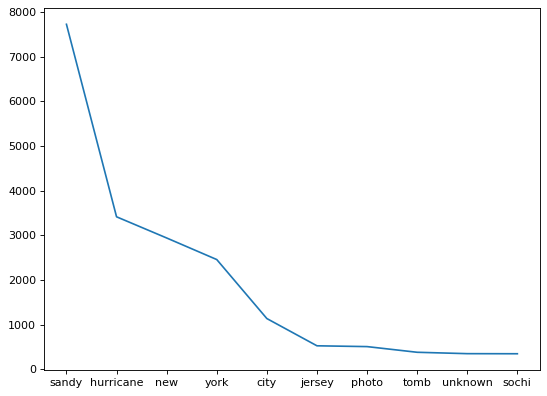

In [213]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# Frequency Distribution Plot of top 10 most occured words
plt.plot(freq.index, freq.values)
plt.show()

# Getting the test dataset ready for ML models

In [214]:
test_set = pandas.read_csv("../mediaeval-2015-testset.txt", sep='\t')

test_set['label_code'] = test_set['label']
testlabels = {'real': 0, 'fake': 1, 'humor': 1}
test_set = test_set.replace({"label_code": testlabels})
test_set['label_code'] = pandas.to_numeric(test_set['label_code'])


In [215]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 8 columns):
tweetId       3755 non-null int64
tweetText     3755 non-null object
userId        3755 non-null int64
imageId(s)    3755 non-null object
username      3755 non-null object
timestamp     3755 non-null object
label         3755 non-null object
label_code    3755 non-null int64
dtypes: int64(3), object(5)
memory usage: 234.8+ KB


In [216]:
#Saving training data and testing data with their labels

X_train = dataset['changed_tweets']
y_train = dataset['label_code']
X_test = test_set['tweetText']
y_test = test_set['label_code']

In [219]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(dic.items()):
    features_chi2 = chi2(_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

NameError: name 'features_train' is not defined

In [218]:
import pickle

#save the training dataset 
save_dataset = open('pickles/dataset.pickle', 'wb')
pickle.dump(dataset, save_dataset)

#save the test dataset
save_test = open('pickles/test_set.pickle', 'wb')
pickle.dump(test_set, save_test)

#save X train
save_X_train = open('pickles/X_train.pickle', 'wb')
pickle.dump(X_train, save_X_train)

#save y train
save_y_train = open('pickles/y_train.pickle', 'wb')
pickle.dump(y_train, save_y_train)

#save X_test
save_X_test = open('pickles/X_test.pickle', 'wb')
pickle.dump(X_test, save_X_test)

#save y test
save_y_test = open('pickles/y_test.pickle', 'wb')
pickle.dump(y_test, save_y_test)
